Za tuje države (omejeno trenutno na Hrvaška, Italija in Avstrija) izračunamo povprečno ceno na m2.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/kvadrati.csv')
tuje_drzave = ['Hrvaška', 'Italija', 'Avstrija'] # Lahko dodamo

df['drzava'] = None

for i, naslov in enumerate(df['naslov']):
    if pd.notna(naslov):
        for drzava in tuje_drzave:
            if drzava.lower() in naslov.lower():
                df.at[i, 'drzava'] = drzava
                break

df_tuje = df[df['drzava'].notnull()]

In [2]:
def get_velikost(v):
    split_v = str(v).split()
    try:
        return float(split_v[0].replace(',', '.'))
    except ValueError:
        return None

def get_cena(c):
    c = str(c).split('€')[0].split('EUR')[0].replace('.', '').replace(',', '').strip()
    try:
        return float(c)
    except ValueError:
        return None

In [3]:
df_tuje = df_tuje.copy()

df_tuje['velikost_clean'] = df_tuje['velikost'].apply(get_velikost)
df_tuje['cena_clean'] = df_tuje['cena'].apply(get_cena)

df_tuje = df_tuje.dropna(subset=['velikost_clean', 'cena_clean'])
df_tuje['cena_na_m2'] = df_tuje['cena_clean'] / df_tuje['velikost_clean']

povprecje = df_tuje.groupby('drzava')['cena_na_m2'].mean().sort_values(ascending=False)

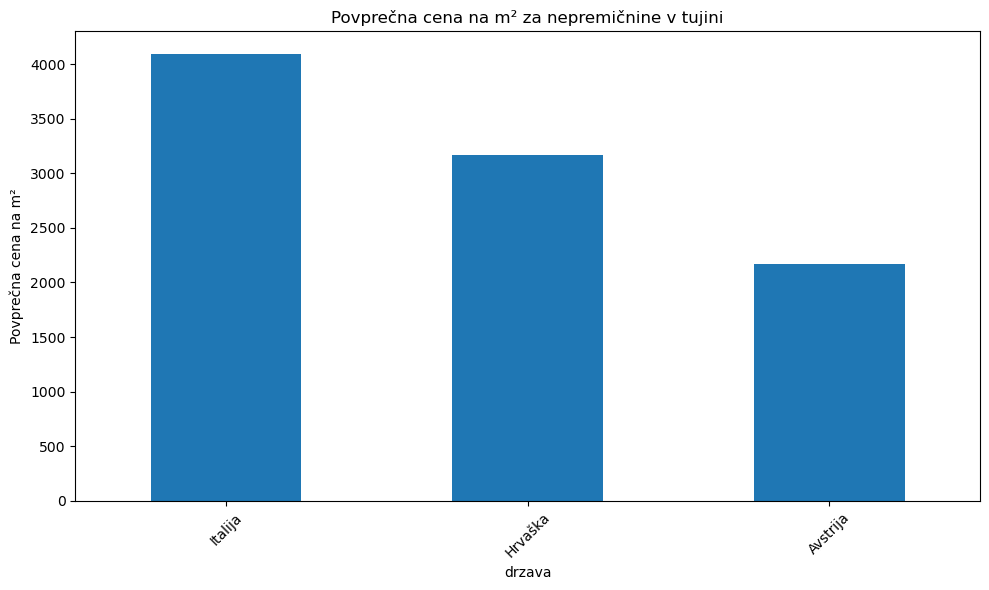

In [4]:
plt.figure(figsize=(10, 6))
povprecje.plot(kind='bar')
plt.ylabel('Povprečna cena na m²')
plt.title('Povprečna cena na m² za nepremičnine v tujini')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()